# <u>**ANALYSING ROCK MUSIC BETWEEN THE YEARS 1956 - 1999**</u>

In this project, I am working with a dataset of rock music tracks from Spotify, which contains information about 5,000+ songs including their name, artist, release year, popularity score, and various audio features such as energy, danceability, etc

The dataset was collected from Kaggle [Link to the dataset](https://www.kaggle.com/datasets/lukaszamora/history-of-rock-19502020) and focuses on some of the most well-known rock tracks from different decades.

The main goal of this analysis is to explore how the popularity of rock music has changed over time, and to understand what factors make certain songs stand the test of time. In other words, I want to find patterns that explain why some songs remain popular even after decades.

For this project, I am using:
- Python for coding
- Numpy and Pandas for data cleaning and analysis
- Matplotlib and Seaborn for data visualisation

By the end of this project, I aim to highlight key trends in rock music popularity, the influence of different audio features, and the artists and songs that continue to resonate with listeners today.

## <u>Imports and Reading Data</u>

In [ ]:
# Importing all required python libraries and setting global seaborn style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Reading the CSV dataset file into a Pandas dataframe
df = pd.read_csv('./history-of-rock-spotify.csv')

## <u>Data Understandling</u>

Before starting the analysis, let's first explore the dataset to understand its structure and contents.

In [3]:
df.shape

(5484, 18)

In [4]:
df.head()

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


In [5]:
df.columns

Index(['index', 'name', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'danceability.1', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
       'tempo', 'time_signature', 'valence'],
      dtype='object')

In [6]:
df.dtypes

index                 int64
name                 object
artist               object
release_date          int64
length              float64
popularity            int64
danceability        float64
acousticness        float64
danceability.1      float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5484 non-null   int64  
 1   name              5484 non-null   object 
 2   artist            5484 non-null   object 
 3   release_date      5484 non-null   int64  
 4   length            5484 non-null   float64
 5   popularity        5484 non-null   int64  
 6   danceability      5484 non-null   float64
 7   acousticness      5484 non-null   float64
 8   danceability.1    5484 non-null   float64
 9   energy            5484 non-null   float64
 10  instrumentalness  5484 non-null   float64
 11  key               5484 non-null   int64  
 12  liveness          5484 non-null   float64
 13  loudness          5484 non-null   float64
 14  speechiness       5484 non-null   float64
 15  tempo             5484 non-null   float64
 16  time_signature    5484 non-null   int64  


,index,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
count,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000
mean,2741.500000,1991.196389,4.148302,49.413202,0.511047,0.173019,0.511047,0.715642,0.076073,5.191284,0.202984,-8.007842,0.057867,125.317722,3.947119,0.556601
std,1583.238769,15.331628,1.496269,17.317263,0.147916,0.242596,0.147916,0.204980,0.196084,3.489761,0.176790,3.534529,0.047112,28.375444,0.290485,0.241503
min,0.000000,1956.000000,0.162533,0.000000,0.000000,0.000001,0.000000,0.003830,0.000000,0.000000,0.012000,-32.909000,0.000000,0.000000,0.000000,0.000000
25%,1370.750000,1978.000000,3.302100,40.000000,0.413000,0.003658,0.413000,0.584000,0.000003,2.000000,0.091400,-10.083750,0.032800,104.362500,4.000000,0.367000
50%,2741.500000,1993.000000,3.945442,52.000000,0.515000,0.048400,0.515000,0.758000,0.000273,5.000000,0.132000,-7.408500,0.042100,123.885000,4.000000,0.561000
75%,4112.250000,2004.000000,4.680271,62.000000,0.611000,0.260250,0.611000,0.885000,0.016800,9.000000,0.269250,-5.308000,0.062900,142.731250,4.000000,0.750250
max,5483.000000,2020.000000,24.091767,84.000000,0.987000,0.995000,0.987000,0.998000,0.993000,11.000000,0.999000,1.949000,0.550000,217.913000,5.000000,0.990000


- `df.shape` tells us about number of rows and columns in the dataframe (rows,columns)
- `df.head()` - shows first 5 rows of the DataFrame  
- `df.columns` - shows all column names  
- `df.dtypes` - shows data type of each column  
- `df.info()` - summary of DataFrame (rows, columns, data types, memory use)  
- `df.describe()` - gives statistical summary (mean, min, max, etc.) for numeric columns  


## <u>Data Preparation</u>

Data preparation includes cleaning and organizing the dataset before analysis.

In [ ]:
df = df[[#'index', 
        'name', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 
       #'danceability.1', 
       'energy',
       #'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
       #'tempo', 'time_signature', 'valence'
       ]]

The above lines of code helps us to select only the required columns (features) with which we wish to perform the analysis.

The details for the selected columns are given below:
- `name` - Name of song.
- `artist` - Name of artist.
- `release_date` - Year song was released (1956-2020).
- `length` - Duration of song in minutes.
- `popularity` - The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
- `danceability` - Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm.
- `acousticness` - A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- `energy` - A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic.


In [ ]:
df['length_minutes'] = pd.to_timedelta(df['length'],unit='m')\
    .dt.components.minutes

- Converts the `length` column (in minutes) to a timedelta and extracts only the minutes part into a new column `length_minutes`.

In [ ]:
def name_clean(name):
    cleaned_name = name.split('-')[0].strip()
    return cleaned_name
df['song_name'] = df['name'].apply(name_clean)

- `name_clean` function removes everything after `-` in the `name` column and extra spaces.  
- `df['song_name'] = df['name'].apply(name_clean)` → applies this function to create a new `song_name` column.

In [ ]:
df.drop(['name'],axis=1,inplace=True)

- Drops the `name` column from the DataFrame permanently (`inplace=True`).

In [ ]:
df = df[['artist','song_name','length_minutes','release_date','popularity','danceability','acousticness','energy']]
df

,artist,song_name,length_minutes,release_date,popularity,danceability,acousticness,energy
0,Nirvana,Smells Like Teen Spirit,5,1991,74,0.502,0.000025,0.912
1,Led Zeppelin,Stairway to Heaven,8,1971,78,0.338,0.580000,0.340
2,Queen,Bohemian Rhapsody,5,1975,74,0.392,0.288000,0.402
3,John Lennon,Imagine,3,1971,77,0.547,0.907000,0.257
4,The Rolling Stones,(I Can't Get No) Satisfaction,3,1965,77,0.723,0.038300,0.863
...,...,...,...,...,...,...,...,...
5479,King Gizzard & The Lizard Wizard,I'm In Your Mind,3,2014,47,0.296,0.005910,0.776
5480,King Gizzard & The Lizard Wizard,Cellophane,3,2014,44,0.432,0.002130,0.887
5481,King Gizzard & The Lizard Wizard,Hot Water,3,2014,40,0.627,0.860000,0.609
5482,CAN,Vitamin C,3,1972,52,0.643,0.006690,0.644


- Reorders and keeps only the specified columns in the DataFrame.

In [ ]:
df.loc[df.duplicated(subset=['song_name','artist','release_date'])]

,artist,song_name,length_minutes,release_date,popularity,danceability,acousticness,energy
625,Iron Maiden,Run to the Hills,3,1982,71,0.249,0.028600,0.943
2189,Sinéad O'Connor,Nothing Compares 2 U,4,1990,75,0.511,0.042500,0.574
2474,The Bravery,An Honest Mistake,3,2005,56,0.460,0.000003,0.889
3187,Metallica,Don't Tread On Me,4,1991,55,0.674,0.004530,0.833
3200,Pink Floyd,The Great Gig in the Sky,4,1973,66,0.275,0.768000,0.216
3283,The Shangri-Las,Remember (Walkin' In The Sand),2,1996,52,0.285,0.733000,0.513
3437,Bryan Adams,Heaven,4,1984,77,0.382,0.046500,0.589
3552,Edward Sharpe & The Magnetic Zeros,Home,5,2009,72,0.545,0.320000,0.590
3674,Godsmack,Voodoo,4,1998,65,0.778,0.170000,0.613
3713,Creed,One Last Breath,3,2001,69,0.386,0.008410,0.677


- Finds duplicate rows based on `song_name`, `artist`, and `release_date` columns.

In [ ]:
df.query('song_name == "Jump"')

,artist,song_name,length_minutes,release_date,popularity,danceability,acousticness,energy
66,Van Halen,Jump,4,1984,79,0.572,0.1710,0.835
5432,Van Halen,Jump,3,1984,0,0.547,0.0745,0.822


- To check all rows where `song_name` is `"Jump"` to inspect duplicates before dropping them. Since `"Jump"` is a duplicate value in column `song_name`

In [20]:
df = df.loc[~df.duplicated(subset=['song_name','artist','release_date'])]\
    .reset_index(drop=True).copy()
df

,artist,song_name,length_minutes,release_date,popularity,danceability,acousticness,energy
0,Nirvana,Smells Like Teen Spirit,5,1991,74,0.502,0.000025,0.912
1,Led Zeppelin,Stairway to Heaven,8,1971,78,0.338,0.580000,0.340
2,Queen,Bohemian Rhapsody,5,1975,74,0.392,0.288000,0.402
3,John Lennon,Imagine,3,1971,77,0.547,0.907000,0.257
4,The Rolling Stones,(I Can't Get No) Satisfaction,3,1965,77,0.723,0.038300,0.863
...,...,...,...,...,...,...,...,...
5460,King Gizzard & The Lizard Wizard,I'm In Your Mind,3,2014,47,0.296,0.005910,0.776
5461,King Gizzard & The Lizard Wizard,Cellophane,3,2014,44,0.432,0.002130,0.887
5462,King Gizzard & The Lizard Wizard,Hot Water,3,2014,40,0.627,0.860000,0.609
5463,CAN,Vitamin C,3,1972,52,0.643,0.006690,0.644


- Removes duplicate rows based on `song_name`, `artist`, and `release_date`.  
- Resets the index and creates a clean copy of the DataFrame.

In [21]:
new_df = df[~df['release_date'].isin(range(2000,2021))].reset_index(drop=True)
new_df

,artist,song_name,length_minutes,release_date,popularity,danceability,acousticness,energy
0,Nirvana,Smells Like Teen Spirit,5,1991,74,0.502,0.000025,0.912
1,Led Zeppelin,Stairway to Heaven,8,1971,78,0.338,0.580000,0.340
2,Queen,Bohemian Rhapsody,5,1975,74,0.392,0.288000,0.402
3,John Lennon,Imagine,3,1971,77,0.547,0.907000,0.257
4,The Rolling Stones,(I Can't Get No) Satisfaction,3,1965,77,0.723,0.038300,0.863
...,...,...,...,...,...,...,...,...
3492,Minutemen,The Politics of Time,1,1984,24,0.541,0.003560,0.638
3493,The B-52's,Planet Claire,4,1979,46,0.715,0.052900,0.549
3494,The Stooges,I Wanna Be Your Dog,3,1969,59,0.523,0.087800,0.941
3495,The Grumpies,Everyday,1,1998,1,0.109,0.452000,0.966


- Creates `new_df` by keeping only rows where `release_date` is between (1956-1999).  
- Resets the index after filtering.

## <u>Exploratory Analysis and Visualization</u>

Here we understand the data patterns, trends, and relationships also use statistics and visualizations (like plots and charts) to explore the dataset.

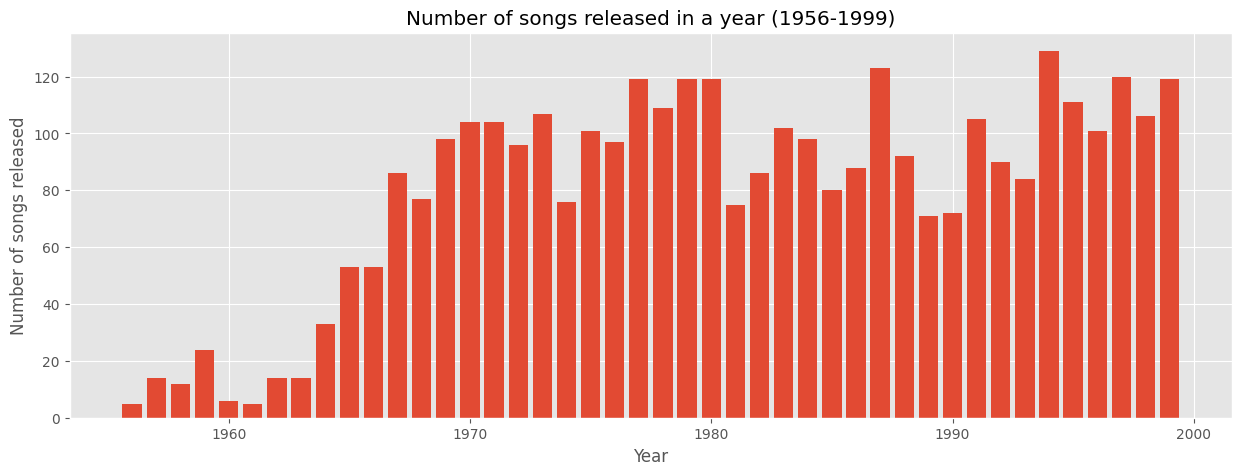

In [22]:
year_song_count = new_df['release_date'].value_counts()
plt.figure(figsize=(15, 5))
plt.bar(year_song_count.index, year_song_count.values)
plt.xlabel("Year")
plt.ylabel("Number of songs released")
plt.title("Number of songs released in a year (1956-1999)")
plt.show()

**It appears that number of rock songs released started increasing in the 1960s and remained in the range 100-120 songs released every year since mid 1960**

Possible reasons:
- Rise of rock culture and popular bands in the 1960s 
- Growth of music industry and record production  
- Increased youth interest in rock music during that era

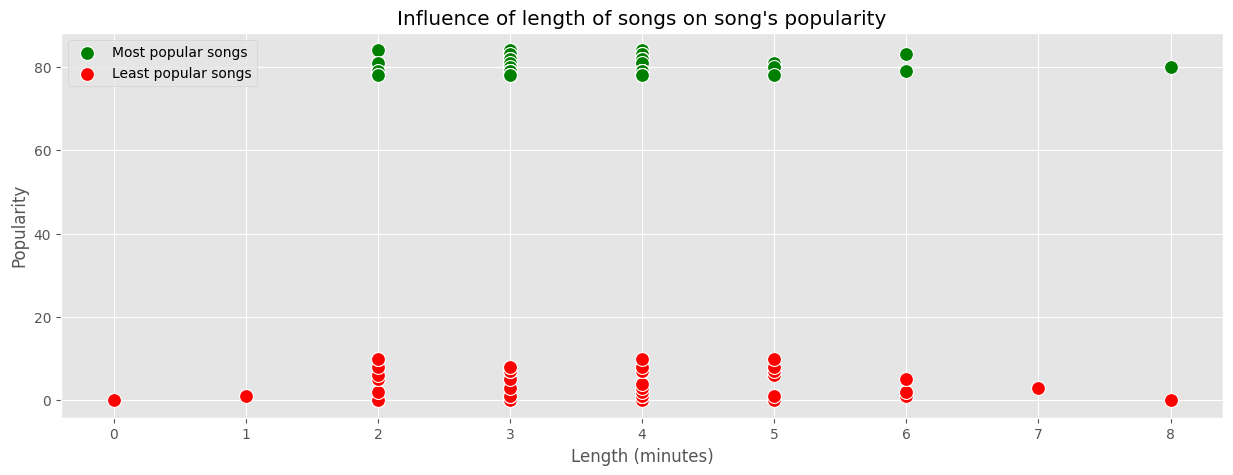

In [25]:
top_songs = new_df.sort_values(by='popularity', ascending=False).head(50)
bottom_songs = new_df.sort_values(by='popularity', ascending=True).head(50)
plt.figure(figsize=(15, 5))
sns.scatterplot(x=top_songs['length_minutes'], y=top_songs['popularity'], color='green', s=100)
sns.scatterplot(x=bottom_songs['length_minutes'], y=bottom_songs['popularity'], color='red', s=100)
plt.xlabel("Length (minutes)")
plt.ylabel("Popularity")
plt.title("Influence of length of songs on song's popularity")
plt.legend(['Most popular songs','Least popular songs'])
plt.show()

**We can infer from the above scatterplot that length of songs didn't seem to have an effect on the popularity of the songs. As an almost equal number of songs both popular and unpopular are present in a range of song length.**

Possible reasons:
- Both short and long songs can become hits if they resonate with listeners.

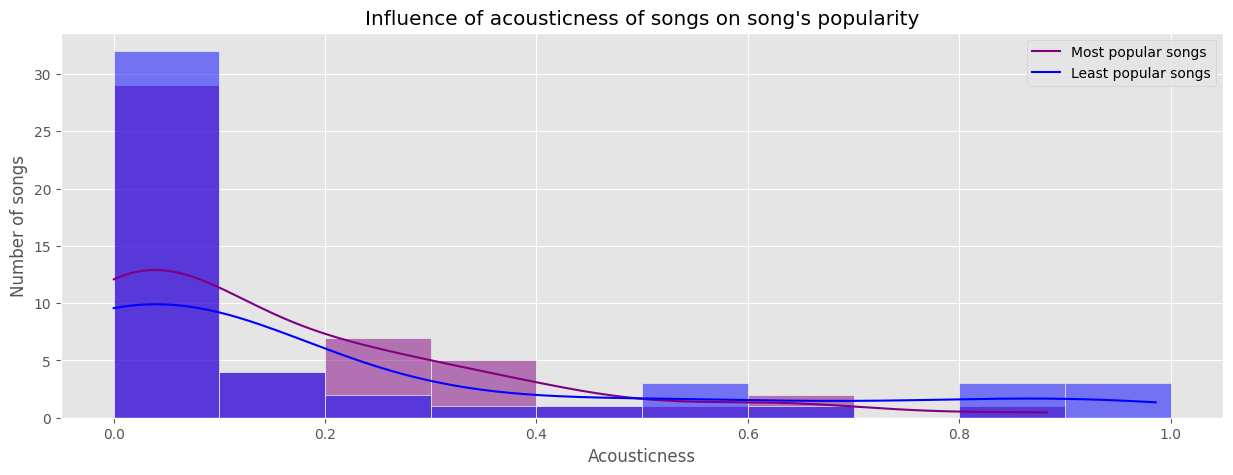

In [26]:
plt.figure(figsize=(15, 5))
sns.histplot(top_songs['acousticness'], bins = np.arange(0,1,0.1) ,color='purple', kde=True)
sns.histplot(bottom_songs['acousticness'], bins = np.arange(0,1.01,0.1), color='blue',kde = True)
plt.xlabel("Acousticness")
plt.ylabel("Number of songs")
plt.title("Influence of acousticness of songs on song's popularity")
plt.legend(['Most popular songs','Least popular songs'])
plt.show()

**It appears that numbers of both popular and unpopular songs decreases as the song's acousticness increases. So similar to song length, acousticness doesn’t seem to strongly affect a song’s popularity.**

Possible reasons:
- As acousticness increases, songs are more mellow or soft.  
- Rock music usually favors energetic, electric sounds, so fewer songs (both popular and unpopular) have very high acousticness.

<Figure size 1500x1000 with 0 Axes>

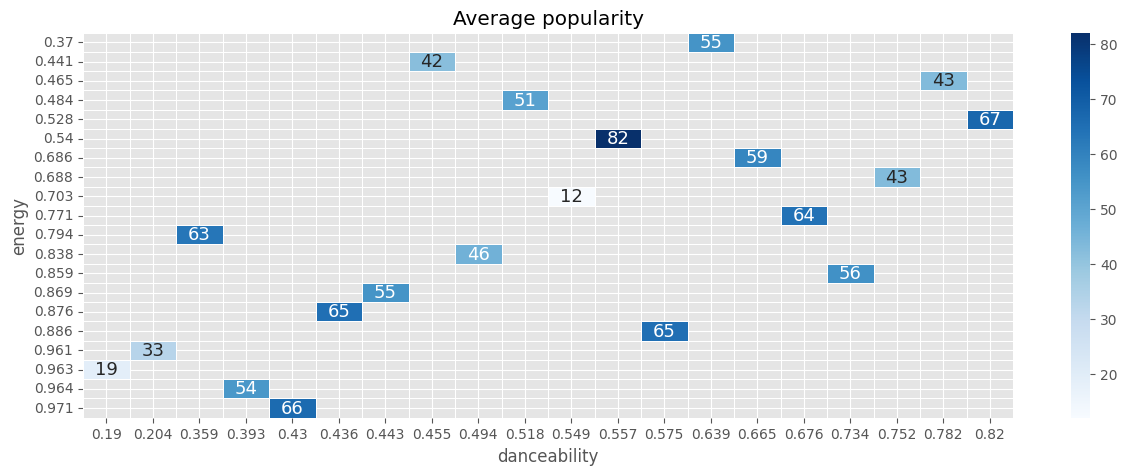

In [27]:
plt.figure(figsize=(15, 10))
sample_df = new_df.sample(20)
sample_input = sample_df.pivot_table(index='energy', columns='danceability', values='popularity', aggfunc='mean')
plt.figure(figsize=(15, 5))
sns.heatmap(sample_input, annot = True, linewidths=.5, cmap='Blues', annot_kws={"fontsize":13})
plt.title('Average popularity')
plt.show()

**The heatmap indicates that in general popular songs had an equal balance of danceability and energy**

Possible reasons-
- Popular rock songs balanced danceability and energy to appeal to listeners for both radio and live performances.  
- Rise of club and festival culture encouraged songs that were energetic but still easy to dance to.  
- Bands aimed for tracks that could engage audiences without being too aggressive or too mellow.

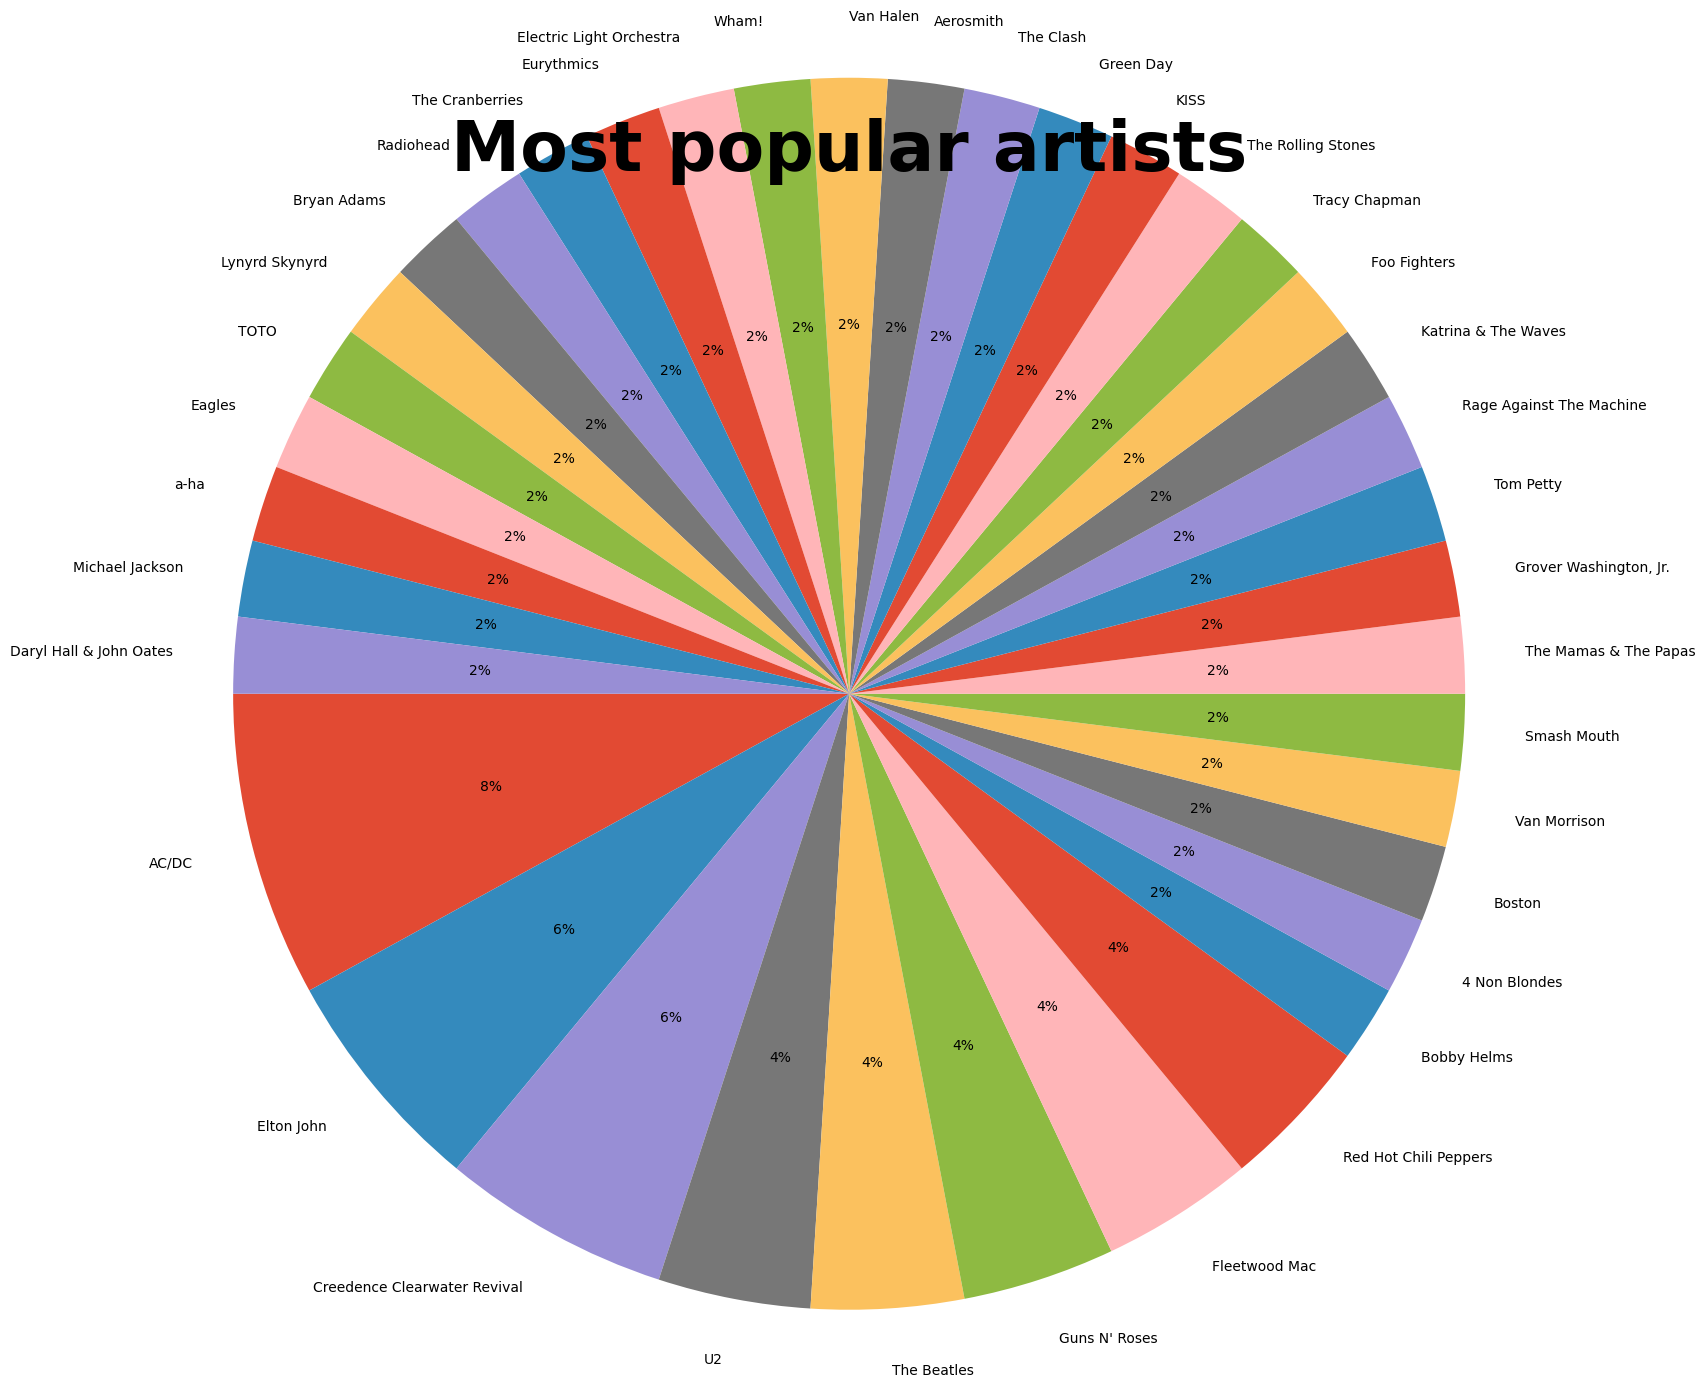

In [28]:
top_artists = top_songs.artist.value_counts()
plt.figure(figsize=(15, 10))
plt.pie(top_artists, labels = top_artists.index, startangle=180, radius=2, autopct='%1.0f%%')
plt.title('Most popular artists', pad=100, fontweight='bold', fontsize=50)
plt.show()

**The pie chart shows the most popular artists based on number of songs they have in the top popular songs between (1956-1999). Each slice represents an artist’s share of top songs**

## <u>Asking and Answering Questions</u>

Answering questions about the data using a plot or statistic.

### Question 1

Observe the average danceability, energy and acousticness of top 10 artists (1956-1999)

In [30]:
top_10 = new_df.sort_values(by='popularity', ascending = False)
top_10 = top_10.loc[~top_10.duplicated(subset=['artist'])].reset_index(drop=True).head(10)
q1_df = new_df.copy()
avg_dance = q1_df[q1_df['artist'].isin(top_10['artist'])].groupby('artist')['danceability'].agg('mean').reindex(top_10['artist'])
avg_energy = q1_df[q1_df['artist'].isin(top_10['artist'])].groupby('artist')['energy'].agg('mean').reindex(top_10['artist'])
avg_acoustics = q1_df[q1_df['artist'].isin(top_10['artist'])].groupby('artist')['acousticness'].agg('mean').reindex(top_10['artist'])

- <u>`top_10` calculation:</u>  
  - Sorts `new_df` by `popularity` in descending order.  
  - Removes duplicate artists so each artist appears only once.  
  - Takes the top 10 most popular artists.

- <u>`avg_dance` calculation:</u> 
  - Filters `new_df` to include only the top 10 artists.  
  - Groups by artist and calculates the **mean danceability** for each artist.  
  - Reorders results to match the order of `top_10`.

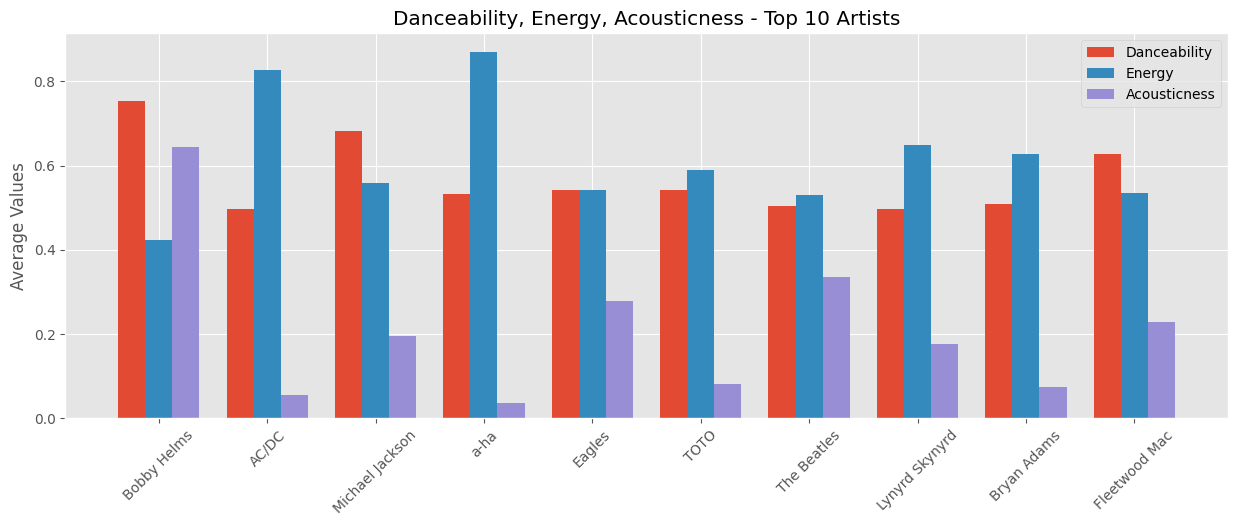

In [31]:
artists = top_10.artist
x = np.arange(len(artists))
width = 0.25
plt.figure(figsize=(15, 5))
plt.bar(x-width, avg_dance, width, label = 'Danceability')
plt.bar(x, avg_energy, width, label = 'Energy')
plt.bar(x+width, avg_acoustics, width, label = 'Acousticness')
plt.xticks(x, artists, rotation=45)
plt.ylabel("Average Values")
plt.title("Danceability, Energy, Acousticness - Top 10 Artists")
plt.legend()
plt.show()

### Question 2

The top 3 song from 1950s, 1960s, 1970s, 1980s and 1990s

**<u>1950s</u>**

In [32]:
df_50s = new_df.copy()
df_50s = df_50s[df_50s['release_date'].isin(range(1956,1960))].reset_index(drop=True)
df_50s = df_50s.sort_values(by='popularity', ascending = False).reset_index(drop=True)
for i in range(3):
    print("Number {} song of 1950s is {} by {}".format(i+1, df_50s.loc[i,'song_name'], df_50s.loc[i, 'artist']))

Number 1 song of 1950s is Johnny B. Goode by Chuck Berry
Number 2 song of 1950s is Jailhouse Rock by Elvis Presley
Number 3 song of 1950s is Hound Dog by Elvis Presley


**Note** - Dataset contains data from 1956.

**<u>1960s</u>**

In [33]:
df_60s = new_df.copy()
df_60s = df_60s[df_60s['release_date'].isin(range(1960,1970))].reset_index(drop=True)
df_60s = df_60s.sort_values(by='popularity', ascending = False).reset_index(drop=True)
for i in range(3):
    print("Number {} song of 1960s is {} by {}".format(i+1, df_60s.loc[i,'song_name'], df_60s.loc[i, 'artist']))

Number 1 song of 1960s is Here Comes The Sun by The Beatles
Number 2 song of 1960s is Fortunate Son by Creedence Clearwater Revival
Number 3 song of 1960s is California Dreamin' by The Mamas & The Papas


**<u>1970s</u>**

In [34]:
df_70s = new_df.copy()
df_70s = df_70s[df_70s['release_date'].isin(range(1970,1980))].reset_index(drop=True)
df_70s = df_70s.sort_values(by='popularity', ascending = False).reset_index(drop=True)
for i in range(3):
    print("Number {} song of 1970s is {} by {}".format(i+1, df_70s.loc[i,'song_name'], df_70s.loc[i, 'artist']))

Number 1 song of 1970s is Highway to Hell by AC/DC
Number 2 song of 1970s is Hotel California by Eagles
Number 3 song of 1970s is The Chain by Fleetwood Mac


**<u>1980s</u>**

In [36]:
df_80s = new_df.copy()
df_80s = df_80s[df_80s['release_date'].isin(range(1980,1990))].reset_index(drop=True)
df_80s = df_80s.sort_values(by='popularity', ascending = False).reset_index(drop=True)
for i in range(3):
    print("Number {} song of 1980s is {} by {}".format(i+1, df_80s.loc[i,'song_name'], df_80s.loc[i, 'artist']))

Number 1 song of 1980s is Back In Black by AC/DC
Number 2 song of 1980s is Africa by TOTO
Number 3 song of 1980s is Billie Jean by Michael Jackson


**<u>1990s</u>**

In [37]:
df_90s = new_df.copy()
df_90s = df_90s[df_90s['release_date'].isin(range(1990,2000))].reset_index(drop=True)
df_90s = df_90s.sort_values(by='popularity', ascending = False).reset_index(drop=True)
for i in range(3):
    print("Number {} song of 1990s is {} by {}".format(i+1, df_90s.loc[i,'song_name'], df_90s.loc[i, 'artist']))

Number 1 song of 1990s is Jingle Bell Rock by Bobby Helms
Number 2 song of 1990s is Creep by Radiohead
Number 3 song of 1990s is Thunderstruck by AC/DC


### Question 3

Observe popularity of rock music by decades 1950s, 1960s, 1970s, 1980s, and 1990s

In [39]:
pop_50s = new_df[new_df['release_date'].isin(range(1956,1960))]['popularity'].agg('mean').round(2)
pop_60s = new_df[new_df['release_date'].isin(range(1960,1970))]['popularity'].agg('mean').round(2)
pop_70s = new_df[new_df['release_date'].isin(range(1970,1980))]['popularity'].agg('mean').round(2)
pop_80s = new_df[new_df['release_date'].isin(range(1980,1990))]['popularity'].agg('mean').round(2)
pop_90s = new_df[new_df['release_date'].isin(range(1990,2000))]['popularity'].agg('mean').round(2)
popularity_decade = np.array([pop_50s, pop_60s, pop_70s, pop_80s, pop_90s])

`pop_50s = new_df[new_df['release_date'].isin(range(1956,1960))]['popularity'].agg('mean').round(2)` this line:
- Filters `new_df` to include only songs released between 1956 and 1959.  
- Calculates the average popularity of these songs using `.agg('mean')`.  
- Rounds the result to 2 decimal places with `.round(2)`.

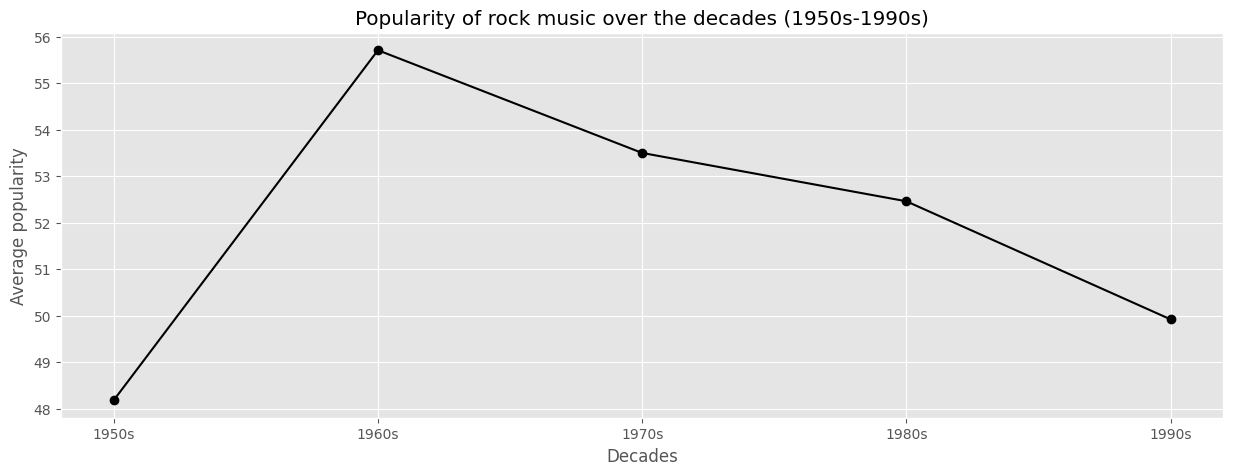

In [40]:
decades = np.array(['1950s', '1960s', '1970s', '1980s', '1990s'])
plt.figure(figsize=(15, 5))
plt.plot(decades, popularity_decade, 'k-o')
plt.title('Popularity of rock music over the decades (1950s-1990s)')
plt.xlabel('Decades')
plt.ylabel('Average popularity')
plt.show()

**Note** - Dataset contains data from 1956, that might be the reason for low popularity of rock songs in 1950s in the above line chart.

**We can observe that popularity of rock music is on a decline between the decades (1960s-1990s)**

## <u>Inferences and Conclusions</u>

### <u>Inferences</u>
- Number of rock songs increased from the 1960s and stabilized around 100-120 per year.  
- Song **length** and **acousticness** did not strongly affect popularity.  
- Popular songs balanced **danceability** and **energy**, likely influenced by live performances and club/festival culture.  
- Certain artists consistently produced more popular songs.  
- Average popularity showed slight variation across decades, reflecting changing listener preferences.

### <u>Conclusions</u>
Popularity of songs didn't depend on song length and acousticness, that means artists could experiment with their songs creating unconventional songs and still become popular. 
Balanced energy and danceability help songs appeal to a wider audience. 
Understanding these trends can help in music production and predicting potential hits.
Also there has been an alarming decline in rock music's popularity with the decades, which shows rooms for improvement.

Long Live Rock n Roll!

## <u>References and Future Work</u>

### <u>References</u>

- Dataset source: [History of rock](https://www.kaggle.com/datasets/lukaszamora/history-of-rock-19502020)  
- Python libraries: Numpy, Pandas, Matplotlib, Seaborn  

### <u>Future Work</u>

- Analyze songs from 2000 onwards to see modern trends.  
- Include other genres for comparison with rock music.
- Explore additional features like `loudness`, `instrumentalness`, `speechiness`, `liveness`, etc.

### Developed by
Aayushman Mukherjee